## Dimension Reduction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

import datetime
from datetime import datetime, timedelta

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA

#from pycaret.clustering import *

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("tissue.csv")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [3]:
df.columns

Index(['x.MAML1', 'x.LHPP', 'x.SEPT10', 'x.B3GNT4', 'x.ZNF280D', 'x.SOX12', 'x.C21orf62', 'x.PER3', 'x.HOXA10', 'x.HOXC5',
       ...
       'x.EPHA1', 'x.MFGE8', 'x.OAZ2', 'x.PCBP3', 'x.POLA1', 'x.KREMEN2', 'x.CYP7B1', 'x.LILRB3', 'x.GSAP', 'y'], dtype='object', length=501)

In [4]:
df.shape

(189, 501)

In [5]:
le = LabelEncoder()

In [6]:
df["y"] = le.fit_transform(df["y"])

In [7]:
df.head()

,x.MAML1,x.LHPP,x.SEPT10,x.B3GNT4,x.ZNF280D,x.SOX12,x.C21orf62,x.PER3,x.HOXA10,x.HOXC5,x.BLVRB,x.ZIM2,x.HEMK1,x.FAP,x.MAN1A1,x.CDA,x.HTR7P1,x.DALRD3,x.FIBP,x.TTTY15,x.SLC30A1,x.SHANK2,x.MSL2,x.UBOX5,x.DUSP13,x.GJB5,x.MTF2,x.PPP1CA,x.IGHMBP2,x.VEGFA,x.KANSL1L,x.FCN3,x.USP32P2,x.HIVEP3,x.HRH1,x.HDAC7,x.HTT,x.IDH3A,x.TLR3,x.F11R,x.MOAP1,x.ISOC2,x.CLIP3,x.FZD10,x.VOPP1,x.RPL4,x.NUDT2,x.RAB30,x.DBI,x.CCDC87,x.GALNT11,x.APBA1,x.IGF2R,x.GNG13,x.KCNE4,x.CETN2,x.OR7A17,x.CINP,x.AQP7,x.CFHR4,x.EXOC6B,x.NDUFS4,x.GALK2,x.NTSR2,x.RPS16,x.FAM30A,x.RRH,x.RPS6KA3,x.CERKL,x.RSRP1,x.H2AFY,x.SMTN,x.GPR171,x.ENPEP,x.ALX4,x.POLL,x.SEMA4A,x.PAFAH1B2,x.LRRN3,x.HNF1A,x.SREBF2,x.NARS2,x.TACC3,x.GALNT2,x.VPS13A,x.ZNF552,x.PA2G4,x.OAZ3,x.CD14,x.SLC38A2,x.HDAC3,x.SPIDR,x.DKKL1,x.DDX49,x.KIN,x.SLC6A11,x.GIP,x.CARD10,x.SUSD6,x.LINC01361,x.PHLDB1,x.SPCS1,x.INF2,x.MAN1A2,x.CELSR2,x.COL1A2,x.UBR2,x.CCL21,x.DMWD,x.KRIT1,x.DDAH2,x.SLC25A5,x.PPME1,x.OPHN1,x.MPZ,x.PRDM14,x.ZC3H7B,x.NECAB3,x.UBE3B,x.ZNF529,x.CRYBA2,x.CCDC86,x.SNAPC3,x.DDX31,x.PRELID3A,x.RPE65,x.ZC3H13,x.IL18R1,x.SREK1,x.AK4,x.VPS51,x.BTG4,x.SDHB,x.EFCAB14,x.KCTD2,x.NDP,x.TMEM185B,x.NUDT11,x.KIR2DL2,x.UQCRC2,x.MPRIP,x.SLC16A4,x.PRR7,x.COL9A1,x.VEGFC,x.GAK,x.NR0B1,x.TMEM104,x.FER1L4,x.RPS11,x.LINC01711,x.C1orf112,x.MYL7,x.LOC643733,x.SAPCD1,x.HSPBAP1,x.GNA11,x.FKBP1B,x.TICAM1,x.GSK3B,x.UBE2O,x.AFDN,x.TICAM2,x.PSMG2,x.BAGE,x.OAZ1,x.TMEM184B,x.WWTR1,x.HHLA1,x.LGALSL,x.LRRC36,x.ARHGEF5,x.TESK2,x.PTPRO,x.FAM184A,x.PLCB1,x.PLEKHO1,x.NBN,x.APOBEC3B,x.ZBTB22,x.LSM1,x.KLRA1P,x.GPA33,x.BDH1,x.EHBP1L1,x.COPB1,x.SLC25A37,x.PBLD,x.MCPH1,x.LOC155060,x.MST1L,x.KCNJ12,x.PRSS3P2,x.NAA11,x.RHOG,x.PTH2R,x.CYP4F11,x.ACAA1,x.SUGP1,x.FOXD1,x.IRS4,x.MUC3A,x.MBTPS1,x.COLGALT2,x.PTGFR,x.KHDRBS1,x.MAPK8IP3,x.PTTG1IP,x.ZNF135,x.MTMR7,x.GYPE,x.RARS,x.GPM6B,x.PMFBP1,x.KLHL9,x.DRG2,x.JAK1,x.TFR2,x.NCOR1,x.IL12RB1,x.COL6A3,x.CLDN10,x.GVINP1,x.EVC,x.TNFAIP2,x.SAMD4B,x.TSFM,x.UBE3A,x.COL4A3BP,x.FCGR3B,x.ATXN3L,x.RAC2,x.ANAPC15,x.RARRES2,x.ATP6V0A2,x.SARDH,x.TBC1D16,x.AATF,x.CHCHD3,x.CASP9,x.BMP8B,x.CAPN3,x.MCTP2,x.SV2B,x.RNF123,x.BCL3,x.RFNG,x.IKZF1,x.RPL3,x.MATN3,x.SAGE1,x.FLI1,x.AGAP1,x.TBX2,x.ARPC5L,x.ZNF274,x.RAB1B,x.IFNA10,x.INE1,x.CD200,x.NAA60,x.NPHP1,x.MSH4,x.GCSH,x.GTF2IRD1,x.ZNF587B,x.LRP4,x.CD93,x.DOCK4,x.VENTXP1,x.NFKBIA,x.PTPRN2,x.NDUFAF7,x.GTF2H3,x.IGKC,x.DKK4,x.KXD1,x.REN,x.ZNF213.AS1,x.B3GALT1,x.PTPRJ,x.ZNF768,x.FOXA2,x.SPTLC3,x.CXorf40A,x.CST8,x.STRAP,x.GJC1,x.DCHS2,x.DNAJC3,x.MARC2,x.SMG1P2,x.BTN2A3P,x.GDF5,x.GRPR,x.CES2,x.LLGL1,x.CELF3,x.FOXK2,x.SHISAL1,x.CYP3A43,x.TRMT2B,x.MEP1B,x.KIF2C,x.VASH2,x.VAT1,x.CLCN1,x.MRPL24,x.POMGNT1,x.CASZ1,x.EEF1E1,x.NOP14.AS1,x.MAP2K6,x.ZNF304,x.ZSWIM8.AS1,x.CYSLTR2,x.AGBL2,x.TMPRSS2,x.SBNO2,x.GREM2,x.SLCO3A1,x.CILP,x.CHMP2A,x.ZNF354A,x.ZNF711,x.SPAST,x.DKFZP434A062,x.CRLF2,x.DDR1.DT,x.LZTS1,x.UTP11,x.MPG,x.EIF4EBP1,x.TUBA4B,x.CEP41,x.PDE4D,x.MORC1,x.ANP32E,x.EPM2AIP1,x.RELB,x.OR3A3,x.ITGA10,x.LTBR,x.MICU2,x.FGD2,x.ULBP2,x.FBN1,x.FAM13A,x.DNAJC28,x.APBB3,x.TBX21,x.PKNOX1,x.SPI1,x.PDC,x.THRB,x.HLA.E,x.ADAMTSL4,x.MYBBP1A,x.IKBKG,x.COL15A1,x.CAMK1G,x.PATJ,x.LANCL2,x.PEX14,x.ZNF43,x.TOP3B,x.SMC2,x.PTPRR,x.TGFBR3,x.DTX4,x.TECPR2,x.OPN3,x.POLR2J3,x.RAB31,x.IRF8,x.TNFRSF21,x.ASTN2,x.ARMCX2,x.SCIN,x.C5orf22,x.CCL2,x.ZBTB43,x.GIGYF2,x.ZFP69B,x.TFB1M,x.ERVH.6,x.H3F3A,x.GRAMD4,x.OR1D4,x.TNFRSF11A,x.ZBTB7C,x.OTC,x.TRIP4,x.RARB,x.PDLIM5,x.SORCS3,x.MYCNOS,x.RCN2,x.EMID1,x.DDT,x.WDR45,x.FBXW4P1,x.MYCBP,x.EXOC3,x.IL10RA,x.ABCC5,x.SPAG4,x.KLF11,x.DLX6,x.FZD2,x.CBARP,x.TCN2,x.GATA2,x.BCKDHB,x.PPM1B,x.TNFRSF13B,x.HAMP,x.KLRD1,x.AP3B2,x.DCTN3,x.ZNF45,x.LTA4H,x.LRIF1,x.CXCL2,x.REEP1,x.WRB,x.RAB5B,x.SMARCD1,x.TFB2M,x.CNTN6,x.FOXE3,x.CEP55,x.ELAC2,x.ZNF767P,x.PCBP4,x.HNRNPUL1,x.KIFAP3,x.TRAV8.3,x.CLCN5,x.BIN1,x.EGFR,x.BZW1,x.NDUFV1,x.WTAP,x.REC8,x.KCMF1,x.LILRB5,x.TFCP2,x.CDH12,x.EHMT2,x.LINC01558,x.ZNHIT3,x.DBF4B,x.GLUD1,x.ADRB2,x.FBXW4,x.SPP1,x.F2R,x.SDF4,x.GALNT8,x.TMEM63A,x.BSCL2,x.GZMM,x.THSD4,x.PRLR,x.PLEKHJ1,x.TLE3,x.PANK2,x.SKP1,x.TOMM70,x.KIAA1324,x.PCDHB12,x.CPA4,x.TRPV2,x.CHCHD2,x.TRPC6,x.MYO

In [8]:
df.y.value_counts()

4    39
0    38
1    34
3    31
5    26
2    15
6     6
Name: y, dtype: int64

In [9]:
X = df.iloc[:,0:500]

In [10]:
X.values

array([[ 9.82567961,  8.3271627 ,  5.4993819 , ...,  4.76001706,
         8.23018205,  6.74038468],
       [ 9.63124675,  8.54282676,  5.64429229, ...,  4.95237261,
         8.33250157,  6.39068256],
       [ 9.69054774,  8.47648577,  5.71718694, ...,  4.79623236,
         7.97819429,  6.67703781],
       ...,
       [ 9.3618059 ,  8.26365314, 10.29656824, ...,  4.88436628,
         8.1768516 ,  5.61143535],
       [ 9.3460355 ,  8.71853424,  9.66081321, ...,  4.9512614 ,
         8.63041198,  5.79046804],
       [ 9.44789324,  8.25538598,  8.46580862, ...,  4.99628241,
         8.70066461,  5.17747408]])

In [11]:
y = df.iloc[:,500]

In [12]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6])

## Standardize all values

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

In [ ]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [ ]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [ ]:
y_hc = hc.fit_predict(X)

In [ ]:
y_hc

In [ ]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [ ]:
y

In [ ]:
y['Cluster'].unique()

In [ ]:
y['Cluster'].value_counts()

In [ ]:
newdf = pd.concat([df,y],axis=1)

In [ ]:
newdf

In [ ]:
meandf = newdf.groupby(by='Cluster').mean()

In [ ]:
meandf

In [ ]:
x_axis = newdf['Balance']
y_axis = newdf['FlightMiles']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation By Hierachical Clustering')
plt.show()

## K-Means Clustering

### Manual K-Means

In [ ]:
model = KMeans(n_clusters=2, random_state=0)

In [ ]:
model.fit(X_scaled)

In [ ]:
labels = model.labels_
labels

In [ ]:
df["Labels"] = model.labels_

In [ ]:
df

In [ ]:
centroids = model.cluster_centers_
centroids

In [ ]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=df["V1"], y=df["V2"], hue=df["Labels"], palette="viridis")
sns.scatterplot(x=centroids[:,0],y=centroids[:,1], s=300)
plt.title("K-Means with 2 clusters")

plt.show()

### Using Elbow Method

In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)

In [ ]:
kmeans.fit(X)

### Analysis Results

In [ ]:
df_segm_kmeans = df.copy()

In [ ]:
df_segm_kmeans

In [ ]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [ ]:
df_segm_kmeans

In [ ]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [ ]:
df_segm_analysis

In [ ]:
#df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means',0]].groupby(['Segment K-Means']).count()

In [ ]:
#df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [ ]:
#df_segm_analysis

In [ ]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         3: 'D'},inplace=True)

In [ ]:
df_segm_analysis

In [ ]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D'})

In [ ]:
df_segm_kmeans

### Plot the clusters

In [ ]:
x_axis = df_segm_kmeans[0]
y_axis = df_segm_kmeans[1]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-Means')
plt.show()

In [ ]:
x_axis = df_segm_kmeans['Edu']
y_axis = df_segm_kmeans['Age']
z_axis = df_segm_kmeans['Income']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

plt.show()

## PyCaret Method

In [ ]:
exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

In [ ]:
kmeans = create_model('kmeans')

In [ ]:
print(kmeans)

In [ ]:
kmodes = create_model('kmodes', num_clusters = 6)

In [ ]:
print(kmodes)

In [ ]:
models()

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'class')

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

In [ ]:
save_model(kmeans,'Final Kmeans Model 08Feb2020')

## MeanShift Clustering

In [ ]:
bandwidth = estimate_bandwidth(X,quantile=0.95, random_state=0) #Adjust Bandwidth to get clusters
bandwidth

In [ ]:
meanshift = MeanShift(bandwidth=bandwidth)
meanshift

In [ ]:
labels = meanshift.fit_predict(X)

In [ ]:
np.unique(labels)

### Results

In [ ]:
df_segm_meanshift = df.copy()

In [ ]:
df_segm_meanshift

In [ ]:
df_segm_meanshift['Segment MeanShift'] = labels

In [ ]:
df_segm_meanshift

In [ ]:
df_segm_meanshift['Labels'] = df_segm_meanshift['Segment MeanShift'].map({0: 'A',
                                                                          1: 'B',
                                                                          2: 'C',
                                                                          3: 'D',
                                                                          4: 'E',
                                                                          })

In [ ]:
df_segm_meanshift

### Plot the clusters

In [ ]:
x_axis = df_segm_meanshift['bldgarea']
y_axis = df_segm_meanshift['bldgdepth']
plt.figure(figsize=(15,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_meanshift['Segment MeanShift'],palette=['g','r','c','m','y'])
plt.title('Segmentation MeanShift')
plt.show()

## DBSCAN method

In [ ]:
epsilon = 0.3
minimumSamples = 50
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_transform)

In [ ]:
labels= db.labels_
labels

In [ ]:
y = pd.DataFrame(labels,columns=['Cluster'])

In [ ]:
y

In [ ]:
y.value_counts()

In [ ]:
dbdf = pd.concat([df1,y],axis=1)

In [ ]:
dbdf

In [ ]:
dbdf["Cluster"].value_counts()

In [ ]:
#-1 are Outliers, hence need to remove from table
db2 = dbdf[dbdf["Cluster"] != -1]

In [ ]:
db2

In [ ]:
db2['Cluster'].value_counts()

In [ ]:
meandb = db2.groupby(by='Cluster').mean()

In [ ]:
meandb

In [ ]:
x_axis = db2['BldgArea']
y_axis = db2['BuiltFAR']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=db2['Cluster'],palette='viridis')
plt.title('DBScan Plot')
plt.show()

We want to explore the tissue_gene_expression predictors by plotting them.

We want to get an idea of which observations are close to each other, but, as you can see from the dimensions, the predictors are 500-dimensional, making plotting difficult. Plot the first two principal components with color representing tissue type.

## Principal Component Analysis

In [16]:
PCAinst = PCA(n_components=2)

In [17]:
X_train = PCAinst.fit_transform(X_train)

In [18]:
X_test = PCAinst.transform(X_test)

In [19]:
X_train

array([[-11.36249616,   2.49799156],
       [-12.76639262,   1.13606712],
       [-11.08896654,   2.58313824],
       [ -7.51368045,   4.80050487],
       [-11.0007396 ,   0.47290279],
       [ 13.62215967,  12.10906118],
       [ 13.05799259,  11.37898862],
       [-10.5100072 ,   2.49751789],
       [-11.91627775,   2.64860675],
       [ -4.69197196,  -0.49288677],
       [  6.70307611,  -4.88726541],
       [  5.3404938 ,  -6.46526711],
       [ 14.07398373,  13.05987764],
       [  3.69309801,  -1.62603401],
       [-12.87689082,   1.69216964],
       [  6.56477386,  -6.89309923],
       [  2.47843867,  -6.69451799],
       [  4.59413541,  -5.15690298],
       [  4.72841251,  -2.32427302],
       [-12.77508659,   1.83225066],
       [  3.94459358,  -2.57707932],
       [  4.51351563,  -7.1395322 ],
       [  6.53095355,  -3.45308096],
       [  5.74599193,  -8.08708656],
       [  5.93504491,  -0.12857939],
       [-11.04934877,   1.87513388],
       [  4.95246762,   0.23311036],
 

In [20]:
X_test

array([[-12.00432817,   1.9418057 ],
       [  3.63737494,  -7.5571336 ],
       [ 13.07045407,   9.71508314],
       [ -9.28540582,   2.92902461],
       [  4.92760461,  -0.38571447],
       [  5.11684486,  -5.18825793],
       [-12.40510674,   1.69474849],
       [  5.19617508,  -2.24974106],
       [  6.6457652 ,  -4.61282775],
       [-11.71354255,   1.84380838],
       [-11.91423669,   1.75764933],
       [  4.76798327,  -1.524076  ],
       [  4.00567742,   2.7001089 ],
       [ 12.33906454,  10.05102795],
       [  2.4730486 ,  -4.25461495],
       [ -9.09229816,   2.39965648],
       [-13.59106624,   0.7179579 ],
       [  5.36794252,  -5.39026969],
       [  6.39690667,  -4.37755284],
       [  5.36586712,  -1.07033498],
       [  4.34586268,  -4.54340423],
       [-13.59095707,   2.52459124],
       [  5.41630781,  -2.49906746],
       [ 13.3119196 ,  12.48899971],
       [  8.98460449,  10.84553213],
       [  3.43036111,  -3.70744584],
       [  5.04276955,  -6.27698096],
 

In [26]:
graph = pd.DataFrame(X_train)

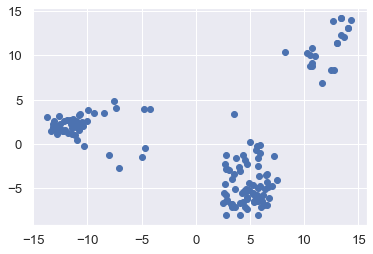

In [29]:
plt.scatter(x=graph[0],y=graph[1])
plt.show()

The predictors for each observation are measured using the same device and experimental procedure. This introduces biases that can affect all the predictors from one observation. For each observation, compute the average across all predictors, and then plot this against the first PC with color representing tissue. Report the correlation.

We see an association with the first PC and the observation averages. Redo the PCA but only after removing the center. Part of the code is provided for you.

For the first 10 PCs, make a boxplot showing the values for each tissue. 